In [1]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
testdata_dir = "E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Federated_Differential_Methylation_Analysis\\Fed_test"

## Dasen normalisation results evaluation  
Comparing the betas calculated based on the dasen normalised methylated and unmethylated values obtained from the original R code (dasen() in the wateRmelon package), the centrally implemented pythonic translation of the dasen normalisation and the federated implementation of the pythonic translation of the dasen normalisation

In [2]:
R_dasen = pd.read_csv("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Data\\Data_Full_Datasets\\GSE66351\\Normalised_Betas.csv" , index_col=0)
Python_dasen = pd.read_csv("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Data\\QC_Python\\GSE66351_normalised_betas.csv", index_col=0)
Federated_dasen1 = pd.read_csv("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Data\\GSE66351_Fed\\even_split1_betas.csv", index_col=0)
Federated_dasen2 = pd.read_csv("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Data\\GSE66351_Fed\\even_split2_betas.csv", index_col=0)
Federated_dasen3 = pd.read_csv("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Data\\GSE66351_Fed\\even_split3_betas.csv", index_col=0)




In [3]:
Federated_dasen = pd.merge(Federated_dasen1, Federated_dasen2, how="left", left_index=True, right_index=True)
Federated_dasen = pd.merge(Federated_dasen, Federated_dasen3, how="left", left_index=True, right_index=True)
Federated_dasen = Federated_dasen[R_dasen.columns]

In [4]:
#test data performance metrics
r_das_test = pd.read_csv("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Federated_Differential_Methylation_Analysis\\Fed_test\\rNorm_test_betas.csv", index_col =0)
fed_das_test1 = pd.read_csv("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Federated_Differential_Methylation_Analysis\\Fed_test\\split1_betas.csv", index_col=0)
fed_das_test2 = pd.read_csv("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Federated_Differential_Methylation_Analysis\\Fed_test\\split2_betas.csv", index_col=0)
fed_das_test3 = pd.read_csv("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Federated_Differential_Methylation_Analysis\\Fed_test\\split3_betas.csv", index_col=0)
fed_das_test = pd.merge(fed_das_test1, fed_das_test2, how="inner", left_index=True, right_index=True)
fed_das_test = pd.merge(fed_das_test, fed_das_test3, how="inner", left_index=True, right_index=True)

### Central pythonic implementation

In [5]:
# absolute difference between the beta values
if np.all(R_dasen.index == Python_dasen.index):
    dasen_diff_python = pd.Series.abs(R_dasen - Python_dasen) 
else: print("different probes in the two dataframes")

average_absolute_diff_python_dasen = dasen_diff_python.mean(axis = 1)
print("The mean absolute average difference between R and pythonic dasen is: ", average_absolute_diff_python_dasen.max())

The mean absolute average difference between R and pythonic dasen is:  7.16690692983588e-06


In [6]:
print("The mean relative average difference between R and pythonic dasen is: ",np.mean((pd.Series.abs((R_dasen - Python_dasen))/R_dasen).max(axis = 1)))
print("The minimum relative average difference between R and pythonic dasen is: ",np.min(((pd.Series.abs(R_dasen - Python_dasen)/R_dasen).min(axis = 1))))
print("The maximum relative average difference between R and pythonic dasen is: ",np.max(((pd.Series.abs(R_dasen - Python_dasen)/R_dasen).max(axis = 1))))

The mean relative average difference between R and pythonic dasen is:  1.5526348833412653e-06
The minimum relative average difference between R and pythonic dasen is:  0.0
The maximum relative average difference between R and pythonic dasen is:  1.757387445496567e-05


In [7]:
# root mean square error between the pythonic/federated beta values and the r beta values (used as ground truth values)
RSEM_probe = np.sqrt(pd.DataFrame.abs((R_dasen - Python_dasen).sum(axis=1)/len(R_dasen))) #for each probe
print("The mean RMSE between R and pyhtonic dasen is:", np.sqrt(pd.DataFrame.abs((R_dasen - Python_dasen).sum(axis=1)/len(R_dasen))).mean())
print("The min RMSE between R and pyhtonic dasen is:", np.sqrt(pd.DataFrame.abs((R_dasen - Python_dasen).sum(axis=1)/len(R_dasen))).min())
print("The max RMSE between R and pyhtonic dasen is:", np.sqrt(pd.DataFrame.abs((R_dasen - Python_dasen).sum(axis=1)/len(R_dasen))).max())

The mean RMSE between R and pyhtonic dasen is: 5.352793403977261e-06
The min RMSE between R and pyhtonic dasen is: 0.0
The max RMSE between R and pyhtonic dasen is: 5.49582515085282e-05


### Federated implementation

Test data

In [9]:
# absolute difference between the beta values
if np.all(r_das_test.index == fed_das_test.index):
    dasen_test_diff_federated = pd.Series.abs(r_das_test - fed_das_test) 
else: print("different probes in the two dataframes")

average_absolute_diff_test_dasen = dasen_test_diff_federated.mean(axis = 1)
print("The max absolute average difference between R_test and Federated_test dasen normalised is: ", average_absolute_diff_test_dasen.max())
print("The min absolute average difference between R_test and Federated_test dasen normalised is: ", average_absolute_diff_test_dasen.min())
print("The mean absolute average difference between R_test and Federated_test dasen normalised is: ", average_absolute_diff_test_dasen.mean())

The max absolute average difference between R_test and Federated_test dasen normalised is:  3.348869451328341e-16
The min absolute average difference between R_test and Federated_test dasen normalised is:  3.412570772413391e-18
The mean absolute average difference between R_test and Federated_test dasen normalised is:  2.313929079847895e-16


In [10]:
print("The mean relative average difference between R_test and Federated_test dasen normalised is: ", np.mean((pd.Series.abs((r_das_test - fed_das_test))/r_das_test).max(axis = 1)))
print("The min relative average difference between R_test and Federated_test dasen normalised is: ", np.min(((pd.Series.abs(r_das_test - fed_das_test)/r_das_test).min(axis = 1))))
print("The max relative average difference between R_test and Federated_test dasen normalised is: ", np.max(((pd.Series.abs(r_das_test - fed_das_test)/r_das_test).max(axis = 1))))

The mean relative average difference between R_test and Federated_test dasen normalised is:  1.922085700728285e-15
The min relative average difference between R_test and Federated_test dasen normalised is:  0.0
The max relative average difference between R_test and Federated_test dasen normalised is:  6.079775351510178e-15


In [7]:
# root mean square error between the pythonic/federated beta values and the r beta values (used as ground truth values)
#RSEM_probe = np.sqrt(pd.DataFrame.abs((r_das_test - fed_das_test).sum(axis=1)/len(r_das_test))) #for each probe
print("The mean RMSE between the R_test and Federated_test dasen normalised data is:", np.sqrt(pd.DataFrame.abs((r_das_test - fed_das_test).sum(axis=1)/len(r_das_test))).mean())
print("The min RMSE between the R_test and Federated_test dasen normalised data is:", np.sqrt(pd.DataFrame.abs((r_das_test - fed_das_test).sum(axis=1)/len(r_das_test))).min())
print("The max RMSE between the R_test and Federated_test dasen normalised data is:", np.sqrt(pd.DataFrame.abs((r_das_test - fed_das_test).sum(axis=1)/len(r_das_test))).max())

The mean RMSE between the R_test and Federated_test dasen normalised data is: 6.185278304593187e-11
The min RMSE between the R_test and Federated_test dasen normalised data is: 0.0
The max RMSE between the R_test and Federated_test dasen normalised data is: 1.599377041945058e-10


Text(0.5, 1.0, 'GSE66351')

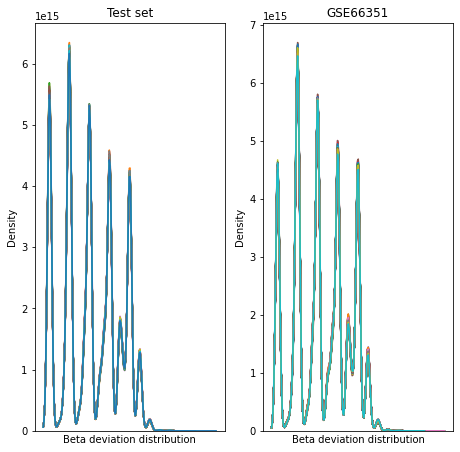

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
#r and fed beta deviation desity distribution plot
# absolute difference between the beta values
if np.all(r_das_test.index == fed_das_test.index):
    dasen_test_diff_federated = pd.Series.abs(r_das_test - fed_das_test) 
else: print("different probes in the two dataframes")
if np.all(R_dasen.index == Federated_dasen.index):
    dasen_diff_federated = pd.Series.abs(R_dasen - Federated_dasen) 
else: print("different probes in the two dataframes")
n,m = dasen_test_diff_federated.shape
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7.5,7.5))
for sample in dasen_test_diff_federated.columns.values:
    sns.kdeplot(x=dasen_test_diff_federated.loc[:,sample], ax=ax1)
    ax1.set_xticks([])
for sample in Federated_dasen.columns.values:
    sns.kdeplot(x=dasen_diff_federated.loc[:,sample], ax=ax2)
    ax2.set_xticks([])
ax1.set_xlabel("Beta deviation distribution")
ax1.set_title("Test set")
ax2.set_xlabel("Beta deviation distribution")
ax2.set_title("GSE66351")

In [13]:
fig.savefig("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Federated_Differential_Methylation_Analysis\\Evaluations\\BetaDeviationDensDist.jpeg")

GSE66351 full dataset

In [8]:
# absolute difference between the beta values
if np.all(R_dasen.index == Federated_dasen.index):
    dasen_diff_federated = pd.Series.abs(R_dasen - Federated_dasen) 
else: print("different probes in the two dataframes")

average_absolute_diff_python_dasen = dasen_diff_federated.mean(axis = 1)
print(average_absolute_diff_python_dasen.max())

2.982993968795486e-16


In [9]:
print("The mean relative average difference between R and Federated dasen is: ", np.mean((pd.Series.abs((R_dasen - Federated_dasen))/R_dasen).max(axis = 1)))
print("The mean relative average difference between R and Federated dasen is: ", np.min(((pd.Series.abs(R_dasen - Federated_dasen)/R_dasen).min(axis = 1))))
print("The mean relative average difference between R and Federated dasen is: ", np.max(((pd.Series.abs(R_dasen - Federated_dasen)/R_dasen).max(axis = 1))))

1.8861091433550313e-15
0.0
6.105011993624403e-15


In [10]:
# root mean square error between the pythonic/federated beta values and the r beta values (used as ground truth values)
RSEM_probe = np.sqrt(pd.DataFrame.abs((R_dasen - Federated_dasen).sum(axis=1)/len(R_dasen))) #for each probe
print("The mean RMSE between the R normalised and the Federated normalised data is:", np.sqrt(pd.DataFrame.abs((R_dasen - Federated_dasen).sum(axis=1)/len(R_dasen))).mean())
print("The min RMSE between the R normalised and the Federated normalised data is:", np.sqrt(pd.DataFrame.abs((R_dasen - Federated_dasen).sum(axis=1)/len(R_dasen))).min())
print("The max RMSE between the R normalised and the Federated normalised data is:", np.sqrt(pd.DataFrame.abs((R_dasen - Federated_dasen).sum(axis=1)/len(R_dasen))).max())

The mean RMSE between the R normalised and the Pyhton normalised data is: 9.384626493805113e-11
The min RMSE between the R normalised and the Pyhton normalised data is: 0.0
The max RMSE between the R normalised and the Pyhton normalised data is: 2.537646863184569e-10


In [ ]:
#r and fed beta deviation desity distribution plot

## EWAS results evaluation

In [ ]:
"E:\Msc Systems Biology\MSB5000_Master_Thesis\Practical work\Data\GSE66351_Fed\even_splits_EWAS_results.csv"

In [27]:
R_EWAS = pd.read_csv("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Data\\Data_Full_Datasets\\GSE66351\\EWAS\\EWAS_GSE66351\\Small_Results_dataset.csv", index_col=0)
#R_EWAS_test = R_EWAS.iloc[0:21,:]
Python_EWAS = pd.read_csv("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Data\\QC_Python\\GSE66351full_results_regression_python.csv", header=[0,1], index_col=0)
Federated_EWAS = pd.read_csv("E:\Msc Systems Biology\MSB5000_Master_Thesis\Practical work\Data\GSE66351_Fed\even_splits_EWAS_results.csv", index_col=0)
#Federated_EWAS_test = Federated_EWAS.iloc[0:21,:]
Federated_EWAS = Federated_EWAS.loc[R_EWAS.index.values,:] # get the probes in the same oder
#test data
r_ewas_test = pd.read_csv("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Federated_Differential_Methylation_Analysis\\Fed_test\\central_r_test_out.csv", index_col=0)
fed_ewas_test = pd.read_csv("E:\\Msc Systems Biology\\MSB5000_Master_Thesis\\Practical work\\Federated_Differential_Methylation_Analysis\\Fed_test\\fed_limma_even_splits.csv", index_col=0) 
fed_ewas_test = fed_ewas_test.loc[r_ewas_test.index.values, :]


Centrally run python linear model

Federated implementation on test set

In [28]:
if np.all(r_ewas_test.index == fed_ewas_test.index):
    coef_diff_federated = pd.Series.abs(r_ewas_test.loc[:,"logFC"] - fed_ewas_test.loc[:,"logFC"]) # the (* -1) negates the sign difference between python and r calculated
    #regression coefficients
else: print("different probes in the two dataframes")

average_absolute_diff_federated = coef_diff_federated.mean()


print("min absolute difference between R_test and Federated_test coefficients: ", coef_diff_federated.min())
print("mean absolute difference between R_test and Federated_test coefficients: ", average_absolute_diff_federated)
print("max absolute difference between R_test and Federated_test coefficients: ", coef_diff_federated.max())

min absolute difference between R_test and Federated_test coefficients:  0.0
min absolute difference between R_test and Federated_test coefficients:  2.0934690023400262e-14
max absolute difference between R_test and Federated_test coefficients:  7.859988701564014e-14


In [30]:
#relative absolute error
pd.Series.abs(sum((r_ewas_test["logFC"] - fed_ewas_test["logFC"]))/len(r_ewas_test["logFC"]))

2.0934214912236577e-14

In [31]:
#check root mean square error between the r (ground truth) and python generated regression coefficients
RMSE_fed = math.sqrt(pd.Series.abs(sum(((r_ewas_test["logFC"] - fed_ewas_test["logFC"]))/len(r_ewas_test["logFC"]))))
print(RMSE_fed) 

1.4468660930520054e-07


Federated implemenation on GSE66351 full dataset

In [19]:
if np.all(R_EWAS.index == Federated_EWAS.index):
    coef_diff_federated = pd.Series.abs(R_EWAS.loc[:,"logFC"] - Federated_EWAS.loc[:,"logFC"]) # the (* -1) negates the sign difference between python and r calculated
    #regression coefficients
else: print("different probes in the two dataframes")

average_absolute_diff_federated = coef_diff_federated.mean()


print("min absolute difference between R and Federated coefficients: ", coef_diff_federated.min())
print("min absolute difference between R and Federated coefficients: ", average_absolute_diff_federated)
print("max absolute difference between R and Federated coefficients: ", coef_diff_federated.max())

min absolute difference between R and Federated coefficients:  8.505939876057855e-11
min absolute difference between R and Federated coefficients:  0.0001519924228280258
max absolute difference between R and Federated coefficients:  0.003977356622969599


In [18]:
pd.Series.abs(sum((R_EWAS["logFC"] - Federated_EWAS["logFC"]))/len(R_EWAS["logFC"]))

4.360390578587629e-07

In [41]:
#check root mean square error between the r (ground truth) and python generated regression coefficients
RMSE_fed = math.sqrt(pd.Series.abs(sum(((R_EWAS["logFC"] - Federated_EWAS["logFC"]))/len(R_EWAS["logFC"]))))
#RMSE_federated = math.sqrt(pd.Series.abs(sum(((R_EWAS_test["Diagnosis_Beta"]*-1) - Federated_EWAS_test[("Coefficient", "Diagnosis")]))/len(R_EWAS_test["Diagnosis_Beta"])))
print(RMSE_fed) 

0.005042883263458197


In [20]:
math.sqrt(pd.Series.abs(sum(((R_EWAS["logFC"] - Federated_EWAS["logFC"]))/len(R_EWAS["logFC"]))))

AttributeError: 'float' object has no attribute 'mean'